<h1 style="text-align:center;">Decision Trees</h1>

Decision trees are like flowcharts that help a computer make decisions based on data. Imagine you're deciding what to wear: if it's raining, you wear a raincoat over your clothes; if it's sunny, you wear sunglasses over your light clothing.

Ensemble methods are techniques in machine learning that combine multiple models to produce a single, more powerful and accurate model. The primary rationale behind ensembles is that when individual models are combined, their strengths can be enhanced greatly while their weaknesses mitigated, leading to better overall performance. These models are often called "base learners" or "weak learners".

Decision trees are the most commonly used base learners in ensemble methods. They work by splitting the data by seemingly asking questions about the columns or features. Let us assume that a decision tree columns that give a value for students time spent on reading a certain subject for a test and the preivious grade the student got. It might create a split  based on say the student read for 5 hours and above and compare the grades received. Next it might check based off of previous grades received and see if there would be distinct grade groupings.

## Decision Tree Classifier

We will now go back to our census data and build a decision tree to predict whether someone earns an income of over 50k US dollars. All the data variables you will see were all stored in the `helper_file.py` module which we will call with the `from helper_file import *`. This practice is heavily discouraged in Pyhton because it could cause conflicts especially when some variables are similar to others. We built this module and to an extent we are sure there are no conflicts..._yet_.

In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt

# Import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV

# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

# Import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import mean_squared_error, accuracy_score

from category_encoders import OneHotEncoder

from helper_file import *

warnings.filterwarnings('ignore')

In [2]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [3]:
census_pipe = Pipeline(
    [('ohe', OHETransformer())]
)

cen_X, cen_y = splitX_y(df_census, 'income')

print(f"shape of target vector: {cen_y.shape}")
print(f"shape of feature matrix: {cen_X.shape}")

shape of target vector: (32561,)
shape of feature matrix: (32561, 13)


In [4]:
cen_X_train, cen_X_test, cen_y_train, cen_y_test = (model_selection
                                    .train_test_split(cen_X, cen_y, 
                                                      test_size=.3, 
                                                      random_state=43,)
                                                        )

X_train = census_pipe.fit_transform(cen_X_train)
X_test = census_pipe.transform(cen_X_test)
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_1,workclass_2,workclass_3,workclass_4,...,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,native-country_42
20717,24,32950,13,0,0,35,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11366,37,34996,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
28940,46,189498,13,0,1848,45,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28302,50,301583,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10929,46,224559,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_census['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

We are going to pass `max_depth=1` so we could easily visualize the tree.

In [6]:
# Initialize classification model

dtc = DecisionTreeClassifier(max_depth=2, random_state=43)

# Fit model on training data
dtc.fit(X_train, cen_y_train)

dtc.score(X_test, cen_y_test)

0.8298699969290613

The `accuracy_score` determines the number of correct predictions divided by the total number of predictions made by the model.

A valuable feature of the decision tree is that we can visualize what happens as decsions are being made. We will do so using maplotlib.

In [7]:
# Get the feature names
feature_names = [cols for cols in X_train.columns]

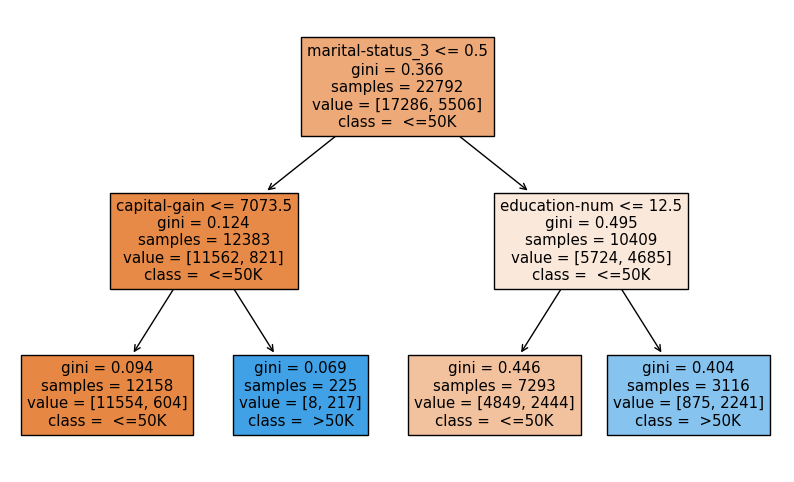

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
_=tree.plot_tree(dtc, 
               feature_names=feature_names,
              filled=True,
              class_names=dtc.classes_,
              ax=ax)

### Root
The root of the tree is at the top. The reading of the first line of the root is from one of the features that was presented to the model and it reads `marital-status_3 <= 0.5` which represents a binary column. All values are either 0 (negative) or 1 (positive). The condition `<= 0.5` suggests a threshold. Since this is a binary feature, the threshold essentially checks if the value is 0 (less than or equal to 0.5) or 1 (greater than 0.5).

The first split is whether one is divorced or not. The left branch is the true branch, which interpretes in this case to the fact that this person is divorced, while the right hand side is the false branch that says the person is not divorced.

**Gini Impurity** The Gini Coefficient was first proposed by an Italian statistician and sociologist Corrado Gini to measure the inequality of wealth in a country; a coefficient of 0 represented equal income by all while 1 represented the situation one person had all the wealth. The formula for determining this coefficient is:
$$\text{Gini}(t) = 1 - \sum_{i=1}^{c} p_i^2$$ where $Gini$ is the Gini coefficient, $c$ is the number of classes, and $p$ is the proportion of the observations that belong to the class $i$.

In Machine Learning, this is called the Gini Impurity the Gini Index. It is used as a measure of how often a randomly chosen element would be incorrectly classified. Given two classes "divorced" and "not divorced",
A Gini index of 0 means that the node has perfect purity and all elements in the set belong to a single class; while a reading of 1 mean complete impurity, which is not achievable in a binary classification scenario. A Gini index of 0.5 means that there's an even split between the the number of correct and incorrect classifications, which is really the maximum we get from a binary classification. We want our readings to be closer to 0 as much as possible. 

Our reading is 0.366. This indicates that the node is impure, but not maximally so. The value signifies that there's a mix of the two classes ("divorced" and "not divorced"), but it's not an even split. This number conveys that the probability of misclassifying a randomly chosen instance from this node, if labeled according to the distribution in the set, is 36.6%. THis value is definitely better than random guessing.

**Samples, values, class**
The total number of _samples_ in the training set reads  22792. The next line shows  [17286 , 5506] which is telling us that 17,286  have a value of 0 meaning they make less than 50K; and 5,506 have a value of 1 meaning they make more than 50K.

### True/Fales nodes

In the left or True node in the second row (which signifies divorcees), the split `capital_gain <= 7073.5` is applied to subsequent nodes. The remaining information comes from the split above the previous branch. Of the 12,383 divorced people, 11,562 have an income of less than 50K, while 821 have an income of more than 50K. The gini index, 0.124, is a very good score. 

### Stumps
A stump in the context of decision trees refers to a decision tree with only one decision node (the root) and two leaf nodes. In other words, it's a tree that makes a single binary decision based on one feature. Because of its simplicity, a stump cannot capture complex patterns in data, and its predictive power is limited. However, its simplicity can be advantageous in ensemble methods, particularly boosting.

### Leaves 
Leaves, also known as terminal nodes or leaf nodes, represent the outcomes of a decision tree. They don't contain any conditions but rather the final predictions. In a classification tree, this would be the class label, and in a regression tree, it would be a continuous value.

The Gini impurity in a leaf provides insight into the uncertainty or impurity of the predictions in that leaf. A Gini impurity of 0 would mean the predictions in that leaf are perfectly pure (all instances belong to a single class), while a value closer to 0.5 (for binary classification) would indicate a higher level of uncertainty. Our left hand leaf gives a Gini index of 0.094 which is quite low, indicating that the predictions in this leaf are very pure.

The next group of values show `samples=12158` and `[11554, 604]`. These two tell us that this leaf correctly giave an accuracy of 95% (11554/12158 * 100). All this just gives us an empirical measure of how well the tree performed on this subset of the training data. 


We can go back to the top, starting from the root and work our way down through the right hand side and perform a similar analysis.

## Bias vs Variance:

- **Bias** refers to the error due to overly simplistic assumptions in the learning algorithm.
- A model with high bias oversimplifies the problem, not capturing the underlying patterns in the data. This can lead to errors in predictions.
- **Underfitting**: When a model has high bias, it's often said to "underfit" the data. This means it doesn't capture the complexity of the training data and therefore performs poorly.


- **Variance** refers to the error due to too much complexity in the learning algorithm.
- A model with high variance pays a lot of attention to the training data, potentially capturing noise and fluctuations.
- **Overfitting**: When a model has high variance, it's often said to "overfit" the data. It fits the training data very closely, even capturing its noise, making it perform poorly on new unseen data.

### Trade-off

- There's a trade-off between bias and variance. Simplifying a model can decrease its variance but increase its bias. Conversely, making a model more complex can decrease its bias but increase its variance.
- The ideal scenario is to have both low bias and low variance. However, achieving this balance can be challenging.

### Big Data and Overfitting

- With the advent of big data, the risk of overfitting becomes significant, especially with models like decision trees that can grow deep and fit training data too closely.
- Regularization techniques, pruning, and ensemble methods can be used to combat overfitting in decision trees and other machine learning models.

## Tuning decision tree hyperparameters

We will start by finding a baseline score using a `DecisionTreeRegressor` on the bike rental data we used in the previous sections

In [9]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 91.5+ KB


In [10]:
bikes_X, bikes_y = splitX_y(df_bikes, 'cnt')

print(f"shape of target vector: {bikes_y.shape}")
print(f"shape of feature matrix: {bikes_X.shape}")

shape of target vector: (731,)
shape of feature matrix: (731, 15)


In [11]:
dtr_pipe = Pipeline(
    [('tweak', PrepDataTransformer()),
     ('imputer', SimpleImputer(strategy='median')),  # Imputing null values using mean
     ('scaler', StandardScaler()),
     ('dt_reg', DecisionTreeRegressor(random_state=43))
    ]
)
scores = cross_val_score(dtr_pipe, bikes_X, bikes_y, scoring='neg_mean_squared_error', cv=5)

rmse = np.sqrt(-scores)

print(f'Reg rmse: {np.round(rmse, 2)}')

print(f'RMSE mean: {rmse.mean()}')

Reg rmse: [1218.13  727.24 1504.93 1000.62 1431.72]
RMSE mean: 1176.5301170918963


The RMSE we got above is worst than any other we had gotten in the past notebooks for this problem. We are not sure why this is so but it could be becuase it is overfitting due to a high variance.

We will check how well the decision tree makes predictions on the training set before it is ready to make on the test set. We will pass the `X_train` into the predict method when the time comes.

In [12]:
pipe = Pipeline(
    [('tweak', PrepDataTransformer()),
     ('imputer', SimpleImputer(strategy='median')),  # Imputing null values using mean
     ('scaler', StandardScaler())
    ]
)

In [13]:
bikes_X_train, bikes_X_test, bikes_y_train, bikes_y_test = (model_selection
                                    .train_test_split(bikes_X, bikes_y, 
                                                      test_size=.3, 
                                                      random_state=43,)
                                                        )

In [14]:
X_train = pipe.fit_transform(bikes_X_train, bikes_y_train)
X_test = pipe.transform(bikes_X_test)

In [15]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, bikes_y_train)
y_pred = dt_reg.predict(X_train)

mse = mean_squared_error(bikes_y_train, y_pred)

rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

RMSE: 0.00


A RMSE of 0.0 means that the model has perfectly fit every data point! Coupled the cross-validation error score, we can deduce that the decision tree is overfitting the data with high variance. The training set fit perfectly, but the test set missed miserably.

Hyperparameter tuning should rectify this.

### GridSearchCV
GridSearchCV searches a grid of hyperparameters using cross-validation to deliver the best results.

GridSearct's fit on a training set, and scored on a test seIthCV checks all hyperparameters before finalizing a mod We can import it from `sklearn.model_selection`.

**max_depth**

We will create a dictionary of a hyperparameter called `max_depth`, which defines the depth of a tree. Remember the last time when we chose a `max_dept=1` so we could easily visualize our tree? The default setting for this is `None`, that means there could hundreds or thousands which could lead to overfitting.

For this example, we will play around with the smaller values for the `max_depth`.el.

In [62]:
params = {'max_depth':[None,2,3,4,6,8,10,20]}

In [17]:
grid_reg = GridSearchCV(dt_reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_reg.fit(X_train, bikes_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 6, 8, 10, 20]},
             scoring='neg_mean_squared_error')

After fitting we next view the best `max_depth` value thus:

In [18]:
best_params = grid_reg.best_params_
print(f"Best params:{best_params}")

Best params:{'max_depth': 6}


What this tells us is that a `max_depth` value of 6 resulted in the best cross-validation score in the training set.

Let us next display the training score  using the `best_score` attribute.

In [19]:
best_score = np.sqrt(-grid_reg.best_score_)
print(f"Training score: {best_score:.3f}")

Training score: 880.513


Even though our goal is to get a very low value, in reality anything too low might not be that good. This value, which is still from the 0.0 we got prior, is very good. We can now work our way up.

Next, the test score is displayed next thus:

In [20]:
best_model = grid_reg.best_estimator_

y_pred = best_model.predict(X_test)

rmse_test = mean_squared_error(bikes_y_test, y_pred)**0.5

print(f'Test score: {rmse_test:.3f}')

Test score: 911.778


We have substantially reduced variance.

**min_samples_leaf** 

This specifies the minimum number of samples required to be at a leaf node. This is a regularization hyperparameter that constrains the size of the tree, making it more general and less susceptible to fluctuations in the data.

A smaller value (like the default of 1) allows leaves with very few samples, leading to a more complex tree that can fit the training data closely leading to overfitting; and a larger value ensures that each leaf has a decent number of samples, leading to a more robust tree. For instance, if `min_samples_leaf=8`, all leaves must contain eight or more samples. We attempt to reduce overfitting by increasing the value, and to reduce underfitting we reduce this value. A trade-off is normally what is best.

For us to test this hyperameter, we would need to go thru the process like we did before. It would be wise then to create a function that does this for us then we store that function in our `helper_file.py` so we import with the others and continue as usual.

In [54]:
def grid_search_optim(df, trgt_vect, params, model):
    """
    This function performs hyperparameter optimization for a given model using GridSearchCV.
    
    Parameters:
    df (pd.DataFrame): The input data frame containing the features and target variable.
    trgt_vect (str): The name of the target variable column in the data frame.
    params (dict): The dictionary containing parameter grid for GridSearchCV.
    model (estimator object): The machine learning model instance to be optimized.
    
    Returns:
    None: This function prints the best parameters and the training and test scores but does not return any values.
    
    Usage:
    >>> optimize_model_parameters(dataframe, 'target_column_name', parameter_grid, DecisionTreeRegressor())
    
    Note:
    - The 'dataframe' should be a data frame containing at least a column with the name specified in 'trgt_vect', which is used as the target variable.
    - 'parameter_grid' should be a dictionary where keys are parameter names (as strings) and values are lists of parameter settings to try as values.
    - 'PrepDataTransformer' should be a predefined class or function to preprocess the data.
    """
    
    # Split the data into features and target variable
    df_X, df_y = splitX_y(df, trgt_vect)

    # Split the data into training and testing sets
    df_X_train, df_X_test, df_y_train, df_y_test = model_selection.train_test_split(
        df_X, df_y, test_size=0.2, random_state=43)
    
    # Define the pipeline with preprocessing steps and the model
    pipe = Pipeline([
        ('tweak', PrepDataTransformer()),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Fit and transform the training data and transform the test data using the pipeline
    X_train = pipe.fit_transform(df_X_train)
    X_test = pipe.transform(df_X_test)
    
    # Instantiate GridSearchCV to optimize the model parameters
    grid_model = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    
    # Fit the model with the optimized parameters
    grid_model.fit(X_train, df_y_train)

    # Extract the best parameters found by GridSearchCV
    best_params = grid_model.best_params_

    # Print the best parameters
    print(f"Best params: {best_params}")
    
    # Compute and print the training score (RMSE)
    best_score = np.sqrt(-grid_model.best_score_)
    print(f"Training score: {best_score:.3f}")

    # Predict the target variable on the test set
    y_pred = grid_model.predict(X_test)

    # Compute and print the test score (RMSE)
    rmse_test = mean_squared_error(df_y_test, y_pred)**0.5
    print(f'Test score: {rmse_test:.3f}')


In [55]:
grid_search_optim(df=df_bikes, trgt_vect='cnt', params=params, model= DecisionTreeRegressor())

Best params: {'max_depth': 8}
Training score: 888.860
Test score: 872.764


We will now add a few more values for `min_samples_leaf` and see what we get.

In [56]:
gscv_params = {'max_depth':[None,2,3,4,6,8,10,20],
               'min_samples_leaf':[1,2,4,6,8,10,20,30]}

In [57]:
grid_search_optim(df=df_bikes, trgt_vect='cnt', params=gscv_params, model= DecisionTreeRegressor())

Best params: {'max_depth': 8, 'min_samples_leaf': 2}
Training score: 865.093
Test score: 867.422


As for reducing variance in the preceding example, limiting `min_samples_leaf` to values greater than three may help.

In [61]:
gscv_params = {'max_depth':[6,7,8,9,10],
               'min_samples_leaf':[3,5,7,9]}

grid_search_optim(df=df_bikes, trgt_vect='cnt', 
                  params=gscv_params, 
                  model= DecisionTreeRegressor())

Best params: {'max_depth': 10, 'min_samples_leaf': 5}
Training score: 875.113
Test score: 893.616


**max_leaf_nodes**

This restricts the total number of leaves in a tree, helping to manage the complexity of the model. For instance, a setting of 10 would limit the tree to a maximum of 10 leaves, but possibly fewer.

**max_features**

This determines the subset of features to consider at each split, aiding in variance reduction. The configurations are:
- 'auto': Utilizes the entire set of features (default).
- 'sqrt': Selects a subset equal to the square root of the total number of features (e.g., 4 features for a 16-feature dataset).
- '$log_2$': Employs a subset calculated as the base-2 logarithm of the total features (e.g., 5 features when the total is 32, since $2^5 = 32$).

**min_samples_split**

This hyperparameter specifies the minimum number of samples required at a node to permit a split, thus preventing the creation of excessively complex trees. For example, a value of 5 prohibits further splits for nodes with 5 or fewer samples.

**splitter**

The `splitter` defines the approach for selecting the split at each node:
- 'best': Opt for the split yielding the highest information gain (default).
- 'random': Chooses a random split, fostering a diversified tree structure and aiding in avoiding overfitting.


**criterion**

The `criterion` parameter signifies the method utilized by the model to assess the quality of potential splits in the decision tree. It serves as a scoring strategy to pinpoint the most beneficial split. 

- For _regressors_, the available options are:
  - `mse` (Mean Squared Error): The default option, which aims to minimize the average of the squares of the differences between actual and predicted values. 
    *Example*: Given predicted values [3, 4] and actual values [3, 5], the mse is calculated as $\frac{((3-3)^2 + (4-5)^2)}{2} = 0.5$.
  - `friedman_mse`: A refined version of mse that incorporates Friedman's adjustment for a more precise approximation.
  - `mae` (Mean Absolute Error): Focuses on minimizing the average absolute differences between the observed and forecasted values.

- For _classifiers_, the choices are:
  - `gini`: Evaluates dataset impurity, striving to minimize the chance of incorrect classification. 
  - `entropy`: Computes dataset impurity using logarithmic functions, often delivering results comparable to the gini criterion.

The algorithm selects the optimal split by computing a score for each possible split using the chosen criterion and opting for the one with the highest score.

--**### min_impurity_decr**ease

The `min_impurity_decrease` parameter determines the threshold for a node split based on the decrease in impurity, which represents the purity of predictions at each node. Essentially, a node will split if the decrease in impurity is equal to or greater than this parameter's value.

- **Impurity**: A metric quantifying the purity of predictions at a node. For instance, a tree with 100% accuracy has an impurity of 0.0, while an 80% accurate tree has an impurity of 0.20. The goal is to continually reduce impurity during the tree-building process, prioritizing splits that cause the most significant impurity decrease.
- **Default Value**: 0.0. Adjusting this value higher can halt tree growth once a specific purity threshold is met, helping to prevent overf**ng.

### min_weight_fr**action_leaf

`min_weight_fraction_leaf` specifies the minimum fraction of the total sample weights needed for a node to be a leaf. It serves as a tool to limit tree complexity and avoid ove_itting.

- _Functionality**: Controls the minimum weighted fraction of the sum total of weights that is required at a leaf node. In simple terms, it determines the minimum number of samples (weighted) that a leaf nod_can have. 
-_*Default Value**: 0.0. For instance, a setting of 0.01 (or 1%) with a dataset of 500 samples necessitates at least 5 samples in a leaf node, assuming **l weights**.

### ccp_alpha

The `ccp_alpha` parameter is primarily used for post-tree building pruning, focusing on minimizing the cost complexity. This discussion is beyond the scope of this section, but you can explore it further in resources on minimal cost

-

### Considerations for Hyperparameter Fine-Tuning

When adjusting hyperparameters, keep in mind the following key aspects:

- **Time Allocation**: The duration dedicated to the tuning process. For instance, allocating more time might allow for a more thorough exploration of parameter space, but could also increase computational costs.
  
- **Hyperparameter Quantity**: The number of hyperparameters you intend to tweak. Remember, it isn't necessary to adjust all available hyperparameters; focusing on a select few might sometimes yield better outcomes. 

- **Desired Accuracy Precision**: The level of accuracy precision you are targeting. This can vary based on the specific demands of your project; for instance, a critical medical research project might necessitate a higher degree of precision compared to a general data analysis project.

The strategies you adopt for tuning, including the time spent and the precision level, largely depend on individual preferences, the dataset in question, and the specific projec

**### Selecting Essential Hyperparame**ters

Utilizing all available decision tree hyperparameters can be overwhelming and often unnecessary. Based on practical experience, fine-tuning a select group of hyperparameters — namely `max_depth`, `max_features`, `min_samples_leaf`, `max_leaf_nodes`, `min_impurity_decrease`, and `min_samples_split` — usually proves to be adequate in achieving desirable resultse to make!t obj we arectives. 

Now, equipped with a foundational understanding of decision trees and their. Let us try to you're ready to apply this knowleke to add or modify.justments or additions.
